In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


import warnings
warnings.filterwarnings("ignore")

## CONTENTS 
- OverSAMPLING
- UnderSAMPLING 
- BalancedRF 

In [2]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

print("N zeros : {}".format((y==0).sum()))
print("N ones : {}".format((y==1).sum()))


N zeros : 990
N ones : 10


In [3]:
def score_new(x_,y_):
    x_train,x_test,y_train,y_test =  train_test_split(x_,y_,test_size=0.2)
    model =  LogisticRegression()
    model.fit(x_train,y_train)
    print("SCORE : {}".format(model.score(x_test,y_test)))
    pred = model.predict(x_test)
    print(classification_report(y_test,pred))
    
    

### Original data and its original performance

SCORE : 0.985
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       197
           1       0.00      0.00      0.00         3

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200



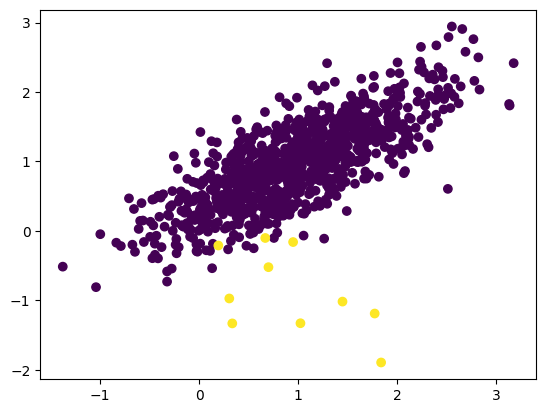

In [4]:
score_new(x,y)
plt.scatter(x[:,0],x[:,1],c=y)


### OverSampling Performace 

N zeros : 990
N ones : 990
SCORE : 0.9772727272727273
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       199
           1       0.96      1.00      0.98       197

    accuracy                           0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396



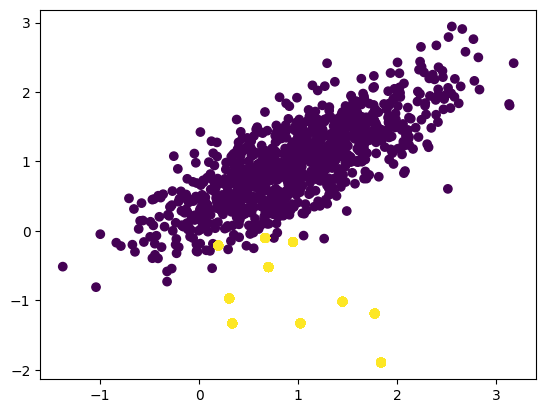

In [5]:
overSampler =  RandomOverSampler(random_state=4)
x_over,y_over =  overSampler.fit_resample(x,y)

print("N zeros : {}".format((y_over==0).sum()))
print("N ones : {}".format((y_over==1).sum()))
score_new(x_over,y_over)
plt.scatter(x_over[:,0],x_over[:,1],c=y_over)


### UnderSampling Performace 

N zeros : 10
N ones : 10
SCORE : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



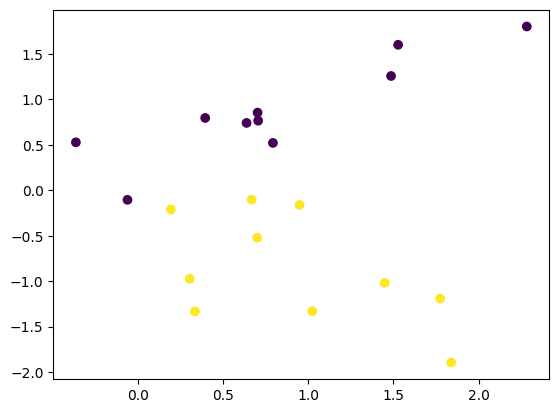

In [6]:
underSampler =  RandomUnderSampler(random_state=42)
x_under,y_under =  underSampler.fit_resample(x,y)

print("N zeros : {}".format((y_under==0).sum()))
print("N ones : {}".format((y_under==1).sum()))
score_new(x_under,y_under)
plt.scatter(x_under[:,0],x_under[:,1],c=y_under)

### BalancedRF

In [7]:


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)



model =  BalancedRandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

print("x shape : {} ||  x_train shape : {} ".format(x.shape,x_train.shape))
print("N zeros : {}".format((y==0).sum()))
print("N ones : {}".format((y==1).sum()))
print("SCORE :",model.score(x_test,y_test))
print(classification_report(y_test,model.predict(x_test)))


x shape : (1000, 2) ||  x_train shape : (800, 2) 
N zeros : 990
N ones : 10
SCORE : 0.96
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       195
           1       0.38      1.00      0.56         5

    accuracy                           0.96       200
   macro avg       0.69      0.98      0.77       200
weighted avg       0.98      0.96      0.97       200

